In [1]:
import numpy as np
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import re

c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
df = pd.read_csv('data\dataset_penyisihan_bdc_2024.csv', sep = ';')
df

,text,label
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik
...,...,...
4995,RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwS...,Politik
4996,Masyarakat yakin bahwa Prabowo-Gibran memiliki...,Politik
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi
4998,@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...,Pertahanan dan Keamanan


In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['lable_encode'] = label_encoder.fit_transform(df['label'])
df

,text,label,lable_encode
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,7
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,5
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,0
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,5
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,5
...,...,...,...
4995,RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwS...,Politik,5
4996,Masyarakat yakin bahwa Prabowo-Gibran memiliki...,Politik,5
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi,1
4998,@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...,Pertahanan dan Keamanan,4


In [4]:
# Initialize IndoBERT tokenizer and model
model_name='cahya/bert-base-indonesian-522M'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
df['label'].value_counts()

label
Politik                    2972
Sosial Budaya               587
Pertahanan dan Keamanan     400
Ideologi                    400
Ekonomi                     367
Sumber Daya Alam            192
Demografi                    62
Geografi                     20
Name: count, dtype: int64

In [7]:
text = "Silakan diganti dengan text apa saja."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0793, -0.4167,  0.0154,  ...,  0.3221, -0.4735, -0.7254],
         [ 0.0719, -0.4572,  0.8288,  ...,  0.2929, -1.1612,  0.3169],
         [-0.1549, -0.9470,  0.3294,  ...,  1.2914, -1.4274,  0.2729],
         ...,
         [-2.4185,  0.1390,  0.6880,  ...,  2.1262,  0.0542,  0.0074],
         [ 0.0424,  0.3114,  0.4211,  ...,  0.5170,  0.4752, -0.7646],
         [-0.2648,  0.4972, -0.8947,  ...,  0.9380, -0.4844, -1.0250]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.1922, -0.5220, -0.8856, -0.1314, -0.2655,  0.5666,  0.1396, -0.3471,
          0.4400,  0.0378, -0.0516,  0.2894,  0.6668,  0.2610,  0.1997,  0.3516,
          0.1368, -0.7667, -0.5884, -0.6019,  0.3103,  0.7261, -0.0594,  0.4173,
          0.2542, -0.1339,  0.4661, -0.0659,  0.1948,  0.2685,  0.5741,  0.0501,
          0.0476, -0.5700,  0.1528, -0.6515, -0.3686, -0.8268,  0.8508,  0.5002,
          0.5736, -0.6772, -0.36

In [8]:
encoding = tokenizer.encode_plus(
  "Silakan diganti dengan text apa saja.",
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


dict_keys(['input_ids', 'attention_mask'])

In [9]:
def tokenize_text(text, tokenizer, max_length=32):
    encoding = tokenizer.encode_plus(
        text,
        max_length=max_length,
        add_special_tokens=True,  # Add '[CLS]' and '[SEP]'
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt'  # Return PyTorch tensors
    )
    return encoding

In [33]:
# Text cleaning function
def clean_text(text):
    
    text = re.sub(r'RT @[A-Za-z0-9_]+', '', text)
    # Remove words RT and RE
    text = re.sub(r'RE [A-Za-z0-9_]+', '', text)

    text = re.sub(r'@\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-alphabetic characters except spaces
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lower case
    text = text.lower().strip()

    # List of additional stopwords to remove
    additional_stopwords = ('rt', 're')
    
    # Remove meaningless words (example: long sequences of characters)
    words = text.split()
    cleaned_words = [word for word in words if not (re.match(r'^[a-z]{10,}$', word) or word in additional_stopwords)]
    
    return ' '.join(cleaned_words)

In [34]:
df['text'] = df.apply(lambda x: clean_text(x['text']), axis=1)
df

,text,label,lable_encode
0,kunjungan prabowo ini untuk dan proyek bantuan...,Sumber Daya Alam,7
1,anies dapat tepuk tangan meriah saat jadi rekt...,Politik,5
2,emng bener sih pendukung ada yg goblok begitu ...,Demografi,0
3,sewaktu anies bersikap kritis ke kinerja pak p...,Politik,5
4,anies baswedan harap asn termasuk tni dan polr...,Politik,5
...,...,...,...
4995,ngeliat debat kemaren pas prabowo kicep kekira...,Politik,5
4996,yakin bahwa memiliki visi yang sejalan dengan ...,Politik,5
4997,imo both are but yg satu jauh lebih tbh but du...,Ekonomi,1
4998,look at that pak ganjar anda sdh di lgislatif ...,Pertahanan dan Keamanan,4


In [12]:
import nlpaug.augmenter.word.context_word_embs as aug

In [13]:
df['text'][0]

'kunjungan prabowo ini untuk dan proyek bantuan air bersih di lima titik prabowo subianto'

In [22]:
augmenter = aug.ContextualWordEmbsAug(model_path='cahya/bert-base-indonesian-522M', action="insert")
augmented_text = augmenter.augment(df['text'][0])
df['text'][0], augmented_text

('kunjungan prabowo ini untuk dan proyek bantuan air bersih di lima titik prabowo subianto',
 ['kunjungan kedua prabowo ini untuk meningkatkan dan membantu proyek bantuan air bersih di komunitas lima kelompok titik prabowo subianto'])

In [35]:
augmented_text = augmenter.augment(df['text'][1000])
augmented_text, df['text'][1000]

(['saya warga warga tionghoa ngaku sosok anies di jakarta dulu kami pernah merasakan joko payung'],
 'warga tionghoa ngaku sosok anies di jakarta dulu kami merasakan payung')

In [43]:
token_lens = []

for txt in df.text:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

C:\Users\siswa\AppData\Local\Temp\ipykernel_3748\1971794795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


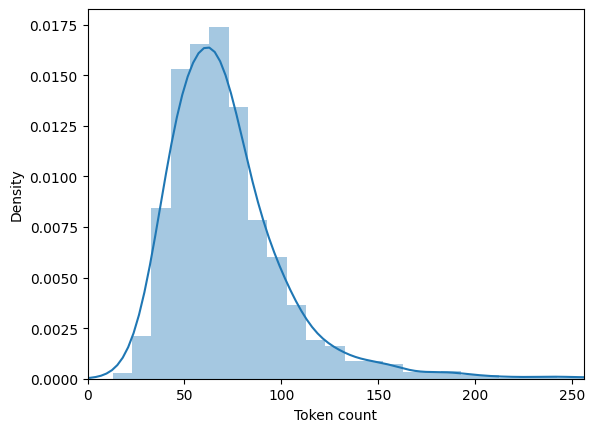

In [46]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

In [47]:
MAX_LEN = 250

In [64]:
df.value_counts('label')

label
Politik                    2972
Sosial Budaya               587
Ideologi                    400
Pertahanan dan Keamanan     400
Ekonomi                     367
Sumber Daya Alam            192
Demografi                    62
Geografi                     20
Name: count, dtype: int64

In [36]:
df_Geografi = df[df['label'] == 'Geografi']
df_Demografi = df[df['label'] == 'Demografi']
df_Sumber_Daya_Alam = df[df['label'] == 'Sumber Daya Alam']
df_Ekonomi = df[df['label'] == 'Ekonomi']
df_Pertahanan_dan_Keamanan = df[df['label'] == 'Pertahanan dan Keamanan']
df_Ideologi = df[df['label'] == 'Ideologi']
df_Sosial_Budaya = df[df['label'] == 'Sosial Budaya']
df_Politik = df[df['label'] == 'Politik']

In [144]:
bert_aug = aug.ContextualWordEmbsAug(model_path='cahya/bert-base-indonesian-522M', action="insert")

def augment_data(data: list, num_aug: int, augmenter = bert_aug):
    new_aug_list = []

    for row in data:
        for _ in range(num_aug):
            new_sentence = augmenter.augment(row)
            if len(new_sentence) < 1:
                continue
            new_sentence = new_sentence[0]
            new_aug_list.append(new_sentence)
    return new_aug_list
  

In [120]:
import math
math.ce

In [143]:
test_data = df_Sosial_Budaya.drop('lable_encode', axis=1)
res  = augment_data(test_data['text'].to_list(), math.ceil(600/test_data.shape[0]))
res

the trending on twitter codice x 2014 anies bubble meroket fenomena fans partner kpop ali join alias amin isme
2015 trending on twitter cak x twitter anies bubble mulai meroket fenomena twitter fans kpop join amin amin isme
abah haji anies ingin martabat para petani petani agar penduduknya tidak terus ‐ menerus menerima bansos karena cukup
abah anies anies ingin martabat petani agar petani tidak terus menerus berhenti menerima bansos ini karena sudah cukup
anies baswedan sesuai arah selera sumatera barat
anies karna sesuai menurut selera sumatera barat
pak aniess post has be reached likes is and on dialog capres at w kadin tvonenews youtube in two days hour minutes it is in the fastest and next highest post release to reach k co likes and m likes among a capress guest members anies
pak is aniess post gain has reached likes and on their dialog capres w kadin di tvonenews youtube on in days hour minutes it is the fastest and highest from post going to go reach k likes and m likes among c

KeyboardInterrupt: 

In [145]:
def generate_augmented_text(target_aug = 3000):
  # Geografi
  # label
  # Politik                    2972
  # Sosial Budaya               587
  # Ideologi                    400
  # Pertahanan dan Keamanan     400
  # Ekonomi                     367
  # Sumber Daya Alam            192
  # Demografi                    62
  # Geografi                     20
  # Sosial Budaya
  print('Augment Sosial Budaya')
  res  = augment_data(df_Sosial_Budaya['text'].to_list(), math.ceil((target_aug-df_Sosial_Budaya.shape[0])/df_Sosial_Budaya.shape[0]))
  df_Sosial_Budaya_aug = pd.DataFrame(data = {'text': res})
  df_Sosial_Budaya_aug['label'] = 'Sosial Budaya'
  df_Sosial_Budaya_aug['aug'] = True
  conc = pd.concat([df_Sosial_Budaya, df_Sosial_Budaya_aug], ignore_index=True)
  conc.to_csv('data/sosial_budaya_aug.csv', sep=';', index=False)
  print('Fiish Augmen Sosial Budaya')

  # Geografi
  res  = augment_data(df_Geografi['text'].to_list(), math.ceil((target_aug-df_Geografi.shape[0])/df_Geografi.shape[0]))
  df_Geografi_aug = pd.DataFrame(data = {'text': res})
  df_Geografi_aug['label'] = 'Geografi'
  df_Geografi_aug['aug'] = True
  conc = pd.concat([df_Geografi, df_Geografi_aug], ignore_index=True)
  conc.to_csv('data/geografi_aug.csv', sep=';', index=False)


  # Pertahanan dan Kemanan
  res  = augment_data(df_Pertahanan_dan_Keamanan['text'].to_list(), math.ceil((target_aug-df_Pertahanan_dan_Keamanan.shape[0])/df_Pertahanan_dan_Keamanan.shape[0]))
  df_Pertahanan_dan_Keamanan_aug = pd.DataFrame(data = {'text': res})
  df_Pertahanan_dan_Keamanan_aug['label'] = 'Pertahanan dan Keamanan'
  df_Pertahanan_dan_Keamanan_aug['aug'] = True
  conc = pd.concat([df_Pertahanan_dan_Keamanan, df_Pertahanan_dan_Keamanan_aug], ignore_index=True)
  conc.to_csv('data/pertahanan_dan_kemanan_aug.csv', sep=';', index=False)

  # Ekonomi
  res  = augment_data(df_Ekonomi['text'].to_list(), math.ceil((target_aug-df_Ekonomi.shape[0])/df_Ekonomi.shape[0]))
  df_Ekonomi_aug = pd.DataFrame(data = {'text': res})
  df_Ekonomi_aug['label'] = 'Ekonomi'
  df_Ekonomi_aug['aug'] = True
  conc = pd.concat([df_Ekonomi, df_Ekonomi_aug], ignore_index=True)
  conc.to_csv('data/ekonomi_aug.csv', sep=';', index=False)

  # Sumber Daya Alam
  res  = augment_data(df_Sumber_Daya_Alam['text'].to_list(), math.ceil((target_aug-df_Sumber_Daya_Alam.shape[0])/df_Sumber_Daya_Alam.shape[0]))
  df_Sumber_Daya_Alam_aug = pd.DataFrame(data = {'text': res})
  df_Sumber_Daya_Alam_aug['label'] = 'Sumber Daya Alam'
  df_Sumber_Daya_Alam_aug['aug'] = True
  conc = pd.concat([df_Sumber_Daya_Alam, df_Sumber_Daya_Alam_aug], ignore_index=True)
  conc.to_csv('data/sumber_daya_alam_aug.csv', sep=';', index=False)

  # Demografi
  res  = augment_data(df_Demografi['text'].to_list(), math.ceil((target_aug-df_Demografi.shape[0])/df_Demografi.shape[0]))
  df_Demografi_aug = pd.DataFrame(data = {'text': res})
  df_Demografi_aug['label'] = 'Demografi'
  df_Demografi_aug['aug'] = True
  conc = pd.concat([df_Demografi, df_Demografi_aug], ignore_index=True)
  conc.to_csv('data/demografi_aug.csv', sep=';', index=False)

  # Ideologi
  res  = augment_data(df_Ideologi['text'].to_list(), math.ceil((target_aug-df_Ideologi.shape[0])/df_Ideologi.shape[0]))
  df_Ideologi_aug = pd.DataFrame(data = {'text': res})
  df_Ideologi_aug['label'] = 'Ideologi'
  df_Ideologi_aug['aug'] = True
  conc = pd.concat([df_Ideologi, df_Ideologi_aug], ignore_index=True)
  conc.to_csv('data/ideologi_aug.csv', sep=';', index=False)



In [146]:
generate_augmented_text()

In [123]:
df_Geografi_aug = pd.DataFrame(data = {'text': res})
df_Geografi_aug['label'] = 'Geografi'
df_Geografi_aug.head()

,text,label
0,malam tahun baru di ganjar salawatan amp baren...,Geografi
1,ayo jangan golput pilih capres di no ganjar pr...,Geografi
2,di tiktok juga ada yg yg bilang anies jadi kep...,Geografi
3,kuliah gratis dampaknya bisa utk semua anak ba...,Geografi
4,owi dan orgnya ngerti pasti bkl sawah panen cu...,Geografi


In [119]:
conc['text'][0]

'malam tahun baru ganjar salawatan amp bareng puluhan ribu warga semarang senin dipimpin gus ali gondrong berlokasi di lapangan sapta rengga bandungan kabupaten semarang suasana penuh suka cita ganjar dan warga dalam menyambut tahun'

In [125]:
conc = pd.concat([df_Geografi, df_Geografi_aug], ignore_index=True)
conc.head()

,text,label,lable_encode
0,malam tahun baru ganjar salawatan amp bareng p...,Geografi,2.0
1,jangan golput pilih capres no ganjar pranowo m...,Geografi,2.0
2,di tiktok ada yg bilang anies kepengen bangun ...,Geografi,2.0
3,kuliah gratis dampaknya bisa utk semua anak ba...,Geografi,2.0
4,owi dan orgnya ngerti pasti bkl panen cuan ban...,Geografi,2.0


In [128]:
conc.to_csv('data/test.csv', sep=';', index=False)

In [88]:
len(df_Geografi_aug)

20

In [66]:
df_Demografi
test_data

,text,label
238,malam tahun baru ganjar salawatan amp bareng p...,Geografi
304,jangan golput pilih capres no ganjar pranowo m...,Geografi
529,di tiktok ada yg bilang anies kepengen bangun ...,Geografi
832,kuliah gratis dampaknya bisa utk semua anak ba...,Geografi
920,owi dan orgnya ngerti pasti bkl panen cuan ban...,Geografi
1180,lu paling gblok lu liat tuh pulau reklamasi be...,Geografi
1607,kata siapa nih sumbernya food estate gunung ma...,Geografi
1952,dhkq nhuhbfvpg,Geografi
2046,xnu dulu marah ke pak anies waktu pulau reklam...,Geografi
2142,setiap temen w komentar anies mah janji doang ...,Geografi


In [151]:
ideologi = pd.read_csv('data/ideologi_aug.csv', sep= ';')
demografi = pd.read_csv('data/demografi_aug.csv', sep= ';')
ekonomi = pd.read_csv('data/ekonomi_aug.csv', sep= ';')
geografi = pd.read_csv('data/geografi_aug.csv', sep= ';')
pertahanan_dan_keamanan = pd.read_csv('data/pertahanan_dan_keamanan_aug.csv', sep= ';')
sosial_budaya = pd.read_csv('data/sosial_budaya_aug.csv', sep= ';')
sumber_daya_alam = pd.read_csv('data/sumber_daya_alam_aug.csv', sep= ';')
politik = df[df['label'] == 'Politik']


In [163]:
combine_data = pd.concat([ideologi, demografi, ekonomi, geografi, pertahanan_dan_keamanan, sosial_budaya, sumber_daya_alam, politik])
combine_data = combine_data.drop('lable_encode', axis=1)
combine_data['aug'] = combine_data['aug'].fillna(False)
combine_data.to_csv('data/combine_data.csv', sep=';', index=False)


C:\Users\siswa\AppData\Local\Temp\ipykernel_10604\4161273346.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combine_data['aug'] = combine_data['aug'].fillna(False)


In [165]:
data = pd.read_csv('data/combine_data.csv', sep=';')
data.value_counts('label')

label
Sosial Budaya              3517
Ekonomi                    3303
Ideologi                   3200
Pertahanan dan Keamanan    3200
Sumber Daya Alam           3057
Demografi                  3038
Geografi                   3000
Politik                    2972
Name: count, dtype: int64

In [236]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict, StratifiedKFold
from sklearn.pipeline import make_pipeline

In [167]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['lable_encode'] = label_encoder.fit_transform(data['label'])
data

,text,label,aug,lable_encode
0,beberapa isu basi terkait dan fakta bisa dilih...,Ideologi,False,3
1,capres cawapres ganjar pranowo dan mahfud md m...,Ideologi,False,3
2,anak muda indonesia the future of this nation ...,Ideologi,False,3
3,calon presiden ri no urut ganjar pranowo gak m...,Ideologi,False,3
4,capres ganjar pranowo yakin atau aturan dasar ...,Ideologi,False,3
...,...,...,...,...
25282,video call dengan capres prabowo subianto pmi ...,Politik,False,5
25283,para kiyai bahwa pasangan merupakan pilihan ya...,Politik,False,5
25284,ftljtmu ratusan ribu hektar prabowo menguasai ...,Politik,False,5
25285,ngeliat debat kemaren pas prabowo kicep kekira...,Politik,False,5


In [197]:
data.shape

(25284, 4)

In [ ]:
data

In [224]:
# Convert text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(data['text'].apply(lambda x: np.str_(x)))
y = data['lable_encode']

In [194]:
data = data.dropna()

In [196]:
X_tfidf.shape, y.shape

((25284, 14500), (25284,))

In [225]:
X_tfidf

<25284x14500 sparse matrix of type '<class 'numpy.float64'>'
	with 715296 stored elements in Compressed Sparse Row format>

In [215]:
data_ori = data[data['aug'] == False]
data_ori.shape

(4997, 4)

In [221]:
data.shape

(25284, 4)

In [226]:

X_test_tfidf = vectorizer.transform(data_ori['text'].apply(lambda x: np.str_(x)))

In [227]:
X_test_tfidf

<4997x14500 sparse matrix of type '<class 'numpy.float64'>'
	with 109148 stored elements in Compressed Sparse Row format>

In [230]:
y_ori = data_ori['lable_encode']
y_ori.shape

(4997,)

In [181]:
X_tfidf

<25287x14500 sparse matrix of type '<class 'numpy.float64'>'
	with 715299 stored elements in Compressed Sparse Row format>

In [231]:
X_train, _ , y_train, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
_, X_test, _, y_test = train_test_split(X_test_tfidf, y_ori, test_size=0.2, random_state=42)


In [211]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [245]:
# Step 3: Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [208]:
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())

In [212]:
pipeline = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

In [ ]:
pipeline = make_pipeline(TfidfVectorizer(), GradientBoostingClassifier())

In [213]:
cv_scores = cross_val_score(pipeline, data['text'], data['label'], cv=5, scoring='accuracy')

In [214]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

Cross-validation scores: [0.6412893  0.87779316 0.89104212 0.908246   0.88231804]
Mean accuracy: 0.8401377226829336
Standard deviation of accuracy: 0.0999677945417125


In [233]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

Cross-validation scores: [0.6412893  0.87779316 0.89104212 0.908246   0.88231804]
Mean accuracy: 0.8401377226829336
Standard deviation of accuracy: 0.0999677945417125


In [234]:
# Step 4: Evaluate the model on the original test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.84      0.96      0.90        85
           2       1.00      1.00      1.00         6
           3       0.82      0.92      0.87        88
           4       0.84      0.99      0.91        79
           5       0.98      0.86      0.92       574
           6       0.82      0.96      0.89       121
           7       0.71      0.97      0.82        36

    accuracy                           0.90      1000
   macro avg       0.84      0.95      0.89      1000
weighted avg       0.91      0.90      0.90      1000



In [246]:
# Step 2: Perform cross-validation using StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store predictions for each fold
y_preds = cross_val_predict(model, X_test_tfidf, y_ori, cv=skf)

In [244]:
data.value_counts('label'), df.value_counts('label')

(label
 Sosial Budaya              3516
 Ekonomi                    3303
 Ideologi                   3200
 Pertahanan dan Keamanan    3200
 Sumber Daya Alam           3056
 Demografi                  3038
 Geografi                   3000
 Politik                    2971
 Name: count, dtype: int64,
 label
 Politik                    2972
 Sosial Budaya               587
 Ideologi                    400
 Pertahanan dan Keamanan     400
 Ekonomi                     367
 Sumber Daya Alam            192
 Demografi                    62
 Geografi                     20
 Name: count, dtype: int64)

In [243]:
data.value_counts('lable_encode')

lable_encode
6    3516
1    3303
3    3200
4    3200
7    3056
0    3038
2    3000
5    2971
Name: count, dtype: int64

In [247]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_ori, y_preds)
report = classification_report(y_ori, y_preds)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7658595157094257
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.06      0.12        62
           1       0.86      0.62      0.72       367
           2       0.00      0.00      0.00        20
           3       0.94      0.47      0.63       400
           4       0.90      0.49      0.64       400
           5       0.74      0.98      0.84      2971
           6       0.87      0.40      0.55       586
           7       0.83      0.31      0.46       191

    accuracy                           0.77      4997
   macro avg       0.73      0.42      0.49      4997
weighted avg       0.79      0.77      0.74      4997



c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [248]:
data_test = pd.read_csv('data/dataset_unlabeled_penyisihan_bdc_2024.csv', sep=';')
data_test

,IDText,Text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...
...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan..."
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...


In [250]:
data_test.columns

Index(['IDText', 'Text'], dtype='object')

In [251]:
data.columns

Index(['text', 'label', 'aug', 'lable_encode'], dtype='object')

In [253]:
data_test['Text'] = data_test.apply(lambda x: clean_text(x['Text']), axis=1)
data_test

,IDText,Text
0,TXT0001,lu mau org di negara ini bisa punya lagi buat ...
1,TXT0002,prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,ganjar pranowo itulah beliau sosok yang nilai ...
3,TXT0004,prabowo gibran yang bisa melakukan itu semua d...
4,TXT0005,lah justru yg gak nyambung junjungan elu ngomo...
...,...,...
995,TXT0996,bikin bangga deh mau setengah dari belanja dan...
996,TXT0997,pak jokowi sebelum pilpres berbesar hati meran...
997,TXT0998,sbaiknya si gemot nga usah ikutan debat dehnga...
998,TXT0999,kebiasaan merembuk atau jadi gaya ganjar sejak...


In [254]:
X_uji = vectorizer.transform(data_test['Text'])

In [255]:
prediction = model.predict(X_uji)

In [260]:
data[data['lable_encode'] ==4]

,text,label,aug,lable_encode
12541,prabowo minta kemenhan dan tim satgas air unha...,Pertahanan dan Keamanan,False,4
12542,ganjar md persiapan dalam kebutuhan dasar alut...,Pertahanan dan Keamanan,False,4
12543,calon presiden capres nomor urut anies basweda...,Pertahanan dan Keamanan,False,4
12544,anies sosok ayah yang penuh pak mmg sosok ayah...,Pertahanan dan Keamanan,False,4
12545,according to prabowo gaza is opressed because ...,Pertahanan dan Keamanan,False,4
...,...,...,...,...
15736,look at at that pak ganjar anda sdh di lgislat...,Pertahanan dan Keamanan,True,4
15737,in look out at order that pak ganjar anda puny...,Pertahanan dan Keamanan,True,4
15738,d look at that pak h ganjar aman anda sdh di l...,Pertahanan dan Keamanan,True,4
15739,look at that pak di ganjar maju anda mungkin s...,Pertahanan dan Keamanan,True,4


In [265]:
lable_map = {
  0:'Demografi',
  1:'Ekonomi',
  2:'Geografi',
  3:'Ideologi',
  4:'Pertahanan dan Keamanan',
  5:'Politik',
  6:'Sosial Budaya',
  7:'Sumber Daya Alam'
}

In [266]:
# Add predictions to the DataFrame
data_test['predicted_label'] = [lable_map[label] for label in prediction]

In [267]:
data_test

,IDText,Text,predicted_label
0,TXT0001,lu mau org di negara ini bisa punya lagi buat ...,Politik
1,TXT0002,prabowo ditanya soal hutang luar negeri dia me...,Pertahanan dan Keamanan
2,TXT0003,ganjar pranowo itulah beliau sosok yang nilai ...,Politik
3,TXT0004,prabowo gibran yang bisa melakukan itu semua d...,Politik
4,TXT0005,lah justru yg gak nyambung junjungan elu ngomo...,Sosial Budaya
...,...,...,...
995,TXT0996,bikin bangga deh mau setengah dari belanja dan...,Politik
996,TXT0997,pak jokowi sebelum pilpres berbesar hati meran...,Politik
997,TXT0998,sbaiknya si gemot nga usah ikutan debat dehnga...,Politik
998,TXT0999,kebiasaan merembuk atau jadi gaya ganjar sejak...,Ekonomi


In [268]:
data_test.to_csv('data/prediction-randomforest.csv', sep=';')

In [269]:
data_test.value_counts('predicted_label')

predicted_label
Politik                    799
Ekonomi                    101
Pertahanan dan Keamanan     45
Sosial Budaya               37
Ideologi                    10
Sumber Daya Alam             7
Demografi                    1
Name: count, dtype: int64

# Train Using Deep Learning

In [271]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [272]:
# Preprocess the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
X = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(X)

In [274]:
y = data['lable_encode']
y

0        3
1        3
2        3
3        3
4        3
        ..
25282    5
25283    5
25284    5
25285    5
25286    5
Name: lable_encode, Length: 25284, dtype: int32

In [275]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [280]:
# Build the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X.shape[1]))
model.add(LSTM(100))
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [281]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 244s 381ms/step - accuracy: 0.5769 - loss: 1.2354 - val_accuracy: 0.9181 - val_loss: 0.2449
Epoch 2/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 242s 382ms/step - accuracy: 0.9491 - loss: 0.1696 - val_accuracy: 0.9359 - val_loss: 0.1871
Epoch 3/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 260s 411ms/step - accuracy: 0.9750 - loss: 0.0782 - val_accuracy: 0.9423 - val_loss: 0.1644
Epoch 4/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 217s 343ms/step - accuracy: 0.9813 - loss: 0.0558 - val_accuracy: 0.9466 - val_loss: 0.1748
Epoch 5/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 253s 329ms/step - accuracy: 0.9859 - loss: 0.0443 - val_accuracy: 0.9458 - val_loss: 0.1772
Epoch 6/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 212s 335ms/step - accuracy: 0.9859 - loss: 0.0413 - val_accuracy: 0.9421 - val_loss: 0.1987
Epoch 7/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 220s 348ms/step - accuracy: 0.9884 - loss: 0.0339 - val_accuracy: 0.9436 - val_loss: 0.2060
Epoch 8/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 216s 342ms/step - accuracy: 0.9893 -

159/159 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9410 - loss: 0.2523
Test Accuracy: 0.94


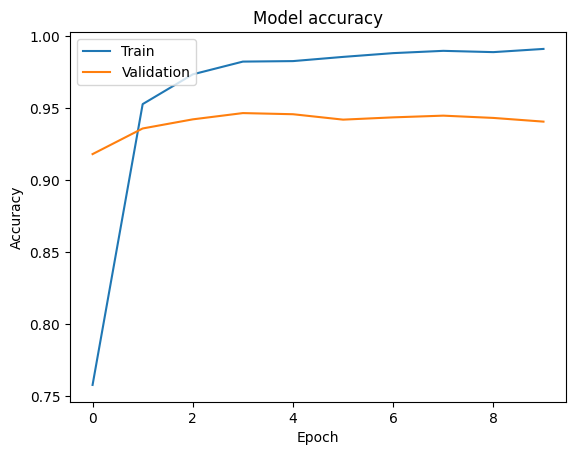

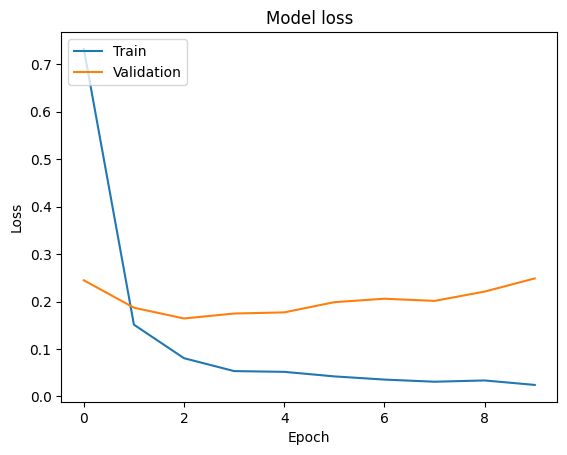

In [282]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f'Test Accuracy: {accuracy:.2f}')

# Optional: Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [283]:
data

,text,label,aug,lable_encode
0,beberapa isu basi terkait dan fakta bisa dilih...,Ideologi,False,3
1,capres cawapres ganjar pranowo dan mahfud md m...,Ideologi,False,3
2,anak muda indonesia the future of this nation ...,Ideologi,False,3
3,calon presiden ri no urut ganjar pranowo gak m...,Ideologi,False,3
4,capres ganjar pranowo yakin atau aturan dasar ...,Ideologi,False,3
...,...,...,...,...
25282,video call dengan capres prabowo subianto pmi ...,Politik,False,5
25283,para kiyai bahwa pasangan merupakan pilihan ya...,Politik,False,5
25284,ftljtmu ratusan ribu hektar prabowo menguasai ...,Politik,False,5
25285,ngeliat debat kemaren pas prabowo kicep kekira...,Politik,False,5


In [285]:
# Predict on new data
test_data = data[data['aug'] == False]
new_texts = test_data['text'].to_list()

X_new = tokenizer.texts_to_sequences(new_texts)
X_new = pad_sequences(X_new, maxlen=X.shape[1])

y_new = test_data['label'].to_list()


predictions = model.predict(X_new)
predicted_labels = [np.argmax(pred) for pred in predictions]
predicted_classes = label_encoder.inverse_transform(predicted_labels)

print('Predictions on new data:')
for text, true_label, predicted_class in zip(new_texts, y_new, predicted_classes):
    print(f'Text: {text} / True Label: {true_label} / Predicted Label: {predicted_class}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step
Predictions on new data:
Text: beberapa isu basi terkait dan fakta bisa dilihat di beberapa anies akan mengganti pancasila dengan sistem khilafah terkait toleransi berbagai penganut blunder soal data rumah ibadah di jakarta anies prabowo untuk jadi capres saat kebenaran dan fakta atas suatu hal telah jelas tapi tetap karena niat jahat nafsu atau bahwa yang buta itu bukan mata tapi hati yang buta / True Label: Ideologi / Predicted Label: Ideologi
Text: capres cawapres ganjar pranowo dan mahfud md mengajak semua pihak untuk bersatu menjaga atau aturan dasar negarajnk / True Label: Ideologi / Predicted Label: Ideologi
Text: anak muda indonesia the future of this nation is in your hand its the time for change anies for yg harus kepada teman lainnya karena sudah saatnya adu ide amp pak anies untuk perubahan indonesia lebih baik lagi / True Label: Ideologi / Predicted Label: Ideologi
Text: calon presiden ri no urut ganjar pranowo gak mainmain dalam 

In [289]:
# Convert class names to class indices for true labels
label_encoder = LabelEncoder()
y_new_encoded = label_encoder.fit_transform(y_new)

# Calculate evaluation metrics using encoded true labels
accuracy = accuracy_score(y_new_encoded, predicted_labels)
precision = precision_score(y_new_encoded, predicted_labels, average='weighted')
recall = recall_score(y_new_encoded, predicted_labels, average='weighted')
f1 = f1_score(y_new_encoded, predicted_labels, average='weighted')

print('Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Classification report
print('Classification Report:')
print(classification_report(y_new_encoded, predicted_labels, target_names=label_encoder.classes_))

Evaluation Metrics:
Accuracy: 0.9471683009805884
Precision: 0.9518546600258821
Recall: 0.9471683009805884
F1-score: 0.9478847759079683
Classification Report:
                         precision    recall  f1-score   support

              Demografi       0.81      0.98      0.89        62
                Ekonomi       0.87      0.98      0.92       367
               Geografi       0.91      1.00      0.95        20
               Ideologi       0.86      0.98      0.91       400
Pertahanan dan Keamanan       0.92      0.98      0.95       400
                Politik       0.99      0.93      0.96      2971
          Sosial Budaya       0.90      0.96      0.93       586
       Sumber Daya Alam       0.91      0.97      0.94       191

               accuracy                           0.95      4997
              macro avg       0.90      0.97      0.93      4997
           weighted avg       0.95      0.95      0.95      4997



In [ ]:
model.predict()

In [294]:
# Define the file path where you want to save the model
model_path = 'C:/Users/siswa/Documents/[BDC]/BDCapeeek/models/LTSM-first.h5'

# Save the model
model.save(model_path)

print(f"Model saved to {model_path}")

Model saved to C:/Users/siswa/Documents/[BDC]/BDCapeeek/models/LTSM-first.h5


In [295]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model(model_path)

print("Model loaded successfully.")

Model loaded successfully.


In [296]:
data_test

,IDText,Text,predicted_label
0,TXT0001,lu mau org di negara ini bisa punya lagi buat ...,Politik
1,TXT0002,prabowo ditanya soal hutang luar negeri dia me...,Pertahanan dan Keamanan
2,TXT0003,ganjar pranowo itulah beliau sosok yang nilai ...,Politik
3,TXT0004,prabowo gibran yang bisa melakukan itu semua d...,Politik
4,TXT0005,lah justru yg gak nyambung junjungan elu ngomo...,Sosial Budaya
...,...,...,...
995,TXT0996,bikin bangga deh mau setengah dari belanja dan...,Politik
996,TXT0997,pak jokowi sebelum pilpres berbesar hati meran...,Politik
997,TXT0998,sbaiknya si gemot nga usah ikutan debat dehnga...,Politik
998,TXT0999,kebiasaan merembuk atau jadi gaya ganjar sejak...,Ekonomi


In [298]:
X_tesss = tokenizer.texts_to_sequences(data_test['Text'].to_list())
X_tesss = pad_sequences(X_tesss, maxlen=X.shape[1])

predictions = loaded_model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step


In [302]:
predicted_labels = [np.argmax(pred) for pred in predictions]
predicted_classes = label_encoder.inverse_transform(predicted_labels)
predicted_classes

array(['Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geografi',
       'Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geografi',
       'Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geografi',
       'Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geografi',
       'Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geografi',
       'Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geografi',
       'Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geografi',
       'Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geografi',
       'Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geografi',
       'Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geografi',
       'Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geografi',
       'Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geografi',
       'Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geografi',
       'Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geografi',
       'Geografi', 'Geografi', 'Geografi', 'Geografi', 'Geogra

In [304]:
data_test['LTSM_predict'] = predicted_classes

In [307]:
data_test.value_counts('LTSM_predict')

LTSM_predict
Geografi    1000
Name: count, dtype: int64

# Modify Input Layer

In [318]:
X = data['text'].values  # Input text data
y_text = data['label'].values  # Text labels

In [320]:
# Preprocess Data
# Convert text labels to numerical categories
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_text)

In [332]:
y

array([3, 3, 3, ..., 5, 5, 5])

In [323]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [333]:
# Tokenize and pad input text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

max_seq_length = max(len(seq) for seq in X_train_seq + X_val_seq)
X_train_padded = pad_sequences(X_train_seq)
X_val_padded = pad_sequences(X_val_seq)

In [334]:
# 2. Model Building
# Define Model Architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_seq_length))
model.add(LSTM(100))
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [340]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 666, 100)       │     1,366,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,343,726 (16.57 MB)

 Trainable params: 1,447,908 (5.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,895,818 (11.05 MB)

In [336]:
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_val_padded, y_val))

Epoch 1/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 210s 330ms/step - accuracy: 0.5847 - loss: 1.2202 - val_accuracy: 0.9059 - val_loss: 0.2867
Epoch 2/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 217s 343ms/step - accuracy: 0.9485 - loss: 0.1657 - val_accuracy: 0.9363 - val_loss: 0.1794
Epoch 3/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 217s 343ms/step - accuracy: 0.9756 - loss: 0.0784 - val_accuracy: 0.9512 - val_loss: 0.1443
Epoch 4/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 211s 334ms/step - accuracy: 0.9832 - loss: 0.0499 - val_accuracy: 0.9492 - val_loss: 0.1534
Epoch 5/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 220s 348ms/step - accuracy: 0.9867 - loss: 0.0429 - val_accuracy: 0.9444 - val_loss: 0.1681
Epoch 6/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 214s 338ms/step - accuracy: 0.9879 - loss: 0.0344 - val_accuracy: 0.9444 - val_loss: 0.1822
Epoch 7/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 216s 342ms/step - accuracy: 0.9888 - loss: 0.0325 - val_accuracy: 0.9484 - val_loss: 0.1782
Epoch 8/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 220s 347ms/step - accuracy: 0.9903 -

In [337]:
# Evaluate Model
loss, accuracy = model.evaluate(X_val_padded, y_val)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

159/159 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9466 - loss: 0.1850
Validation Loss: 0.19084005057811737, Validation Accuracy: 0.9460154175758362


In [339]:
model.save(filepath='C:/Users/siswa/Documents/[BDC]/BDCapeeek/models/LTSM-second.keras')

In [342]:
X_testcoy = data_test['Text']

X_testcoy_seq = tokenizer.texts_to_sequences(X_testcoy)
X_testcoy_padded = pad_sequences(X_testcoy_seq)

In [343]:
pred = model.predict(X_testcoy_padded)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


In [347]:
predicted_labels = np.argmax(pred, axis=1)
predicted_text_labels = label_encoder.inverse_transform(predicted_labels)
predicted_text_labels

array(['Politik', 'Pertahanan dan Keamanan', 'Ideologi', 'Politik',
       'Ekonomi', 'Politik', 'Politik', 'Politik', 'Politik', 'Ekonomi',
       'Politik', 'Politik', 'Politik', 'Sosial Budaya',
       'Pertahanan dan Keamanan', 'Politik', 'Politik', 'Politik',
       'Demografi', 'Politik', 'Politik', 'Ekonomi', 'Ekonomi',
       'Pertahanan dan Keamanan', 'Sumber Daya Alam', 'Politik',
       'Politik', 'Politik', 'Politik', 'Politik', 'Politik', 'Politik',
       'Politik', 'Sosial Budaya', 'Politik', 'Politik', 'Politik',
       'Sumber Daya Alam', 'Politik', 'Politik', 'Politik', 'Ekonomi',
       'Politik', 'Ekonomi', 'Politik', 'Ekonomi', 'Ekonomi', 'Politik',
       'Politik', 'Politik', 'Politik', 'Politik', 'Politik', 'Politik',
       'Politik', 'Politik', 'Politik', 'Ideologi', 'Sosial Budaya',
       'Politik', 'Politik', 'Pertahanan dan Keamanan', 'Politik',
       'Pertahanan dan Keamanan', 'Politik', 'Ekonomi', 'Politik',
       'Politik', 'Politik', 'Pertahanan dan 

In [349]:
data_test['LTSM_predict_2'] = predicted_text_labels

In [353]:
data_test.to_csv('predict/LTSM_predict.csv', sep=';', index=False)